In [40]:
import pandas as pd
from visualization import *
from data_loader import *
from scipy.stats import chi2_contingency
from PCA import fair_PCA

import warnings
warnings.filterwarnings("ignore")

In [41]:
race_cols = ['Race_American_Indian_Alaska_Native',
        'Race_Asian',
        'Race_Black_African_American',
        'Race_Native_Hawaiian_Pacific_Islander',
        'Race_White',
        'Race_White_Latino']

features = ['loan_amount_000s', 'loan_type', 
       'property_type','applicant_income_000s', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units', 
       'number_of_1_to_4_family_units', 'state_code', 'county_code', 'lien_status']

clean_features = ['Loan Amount', 'Loan Type', 'Property Type', 'Applicant Income',
                'Family Income', 'Income Ratio', 'Occupied Units', '1-4 Family Units',
                'State Code', 'County Code', 'Lien Status']

In [42]:
data = data_loader(race_cols, num=100000)
print(len(data))
print(data.race_ethnicity.value_counts())

data = data.dropna(subset=['applicant_income_000s'])
print(len(data))

data = data[data.applicant_income_000s < 10000]
print(len(data))
print(data.race_ethnicity.value_counts())

Loading data...
processed_data.csv exists. Loading data from file.
564944
race_ethnicity
5    415978
9     57182
3     49420
2     34230
1      5237
4      2897
Name: count, dtype: int64
542916
542858
race_ethnicity
5    400992
9     55059
3     45944
2     33170
1      4935
4      2758
Name: count, dtype: int64


In [43]:
data[data.action_taken == 'Denied'].purchaser_type.value_counts()

purchaser_type
0    111058
Name: count, dtype: int64

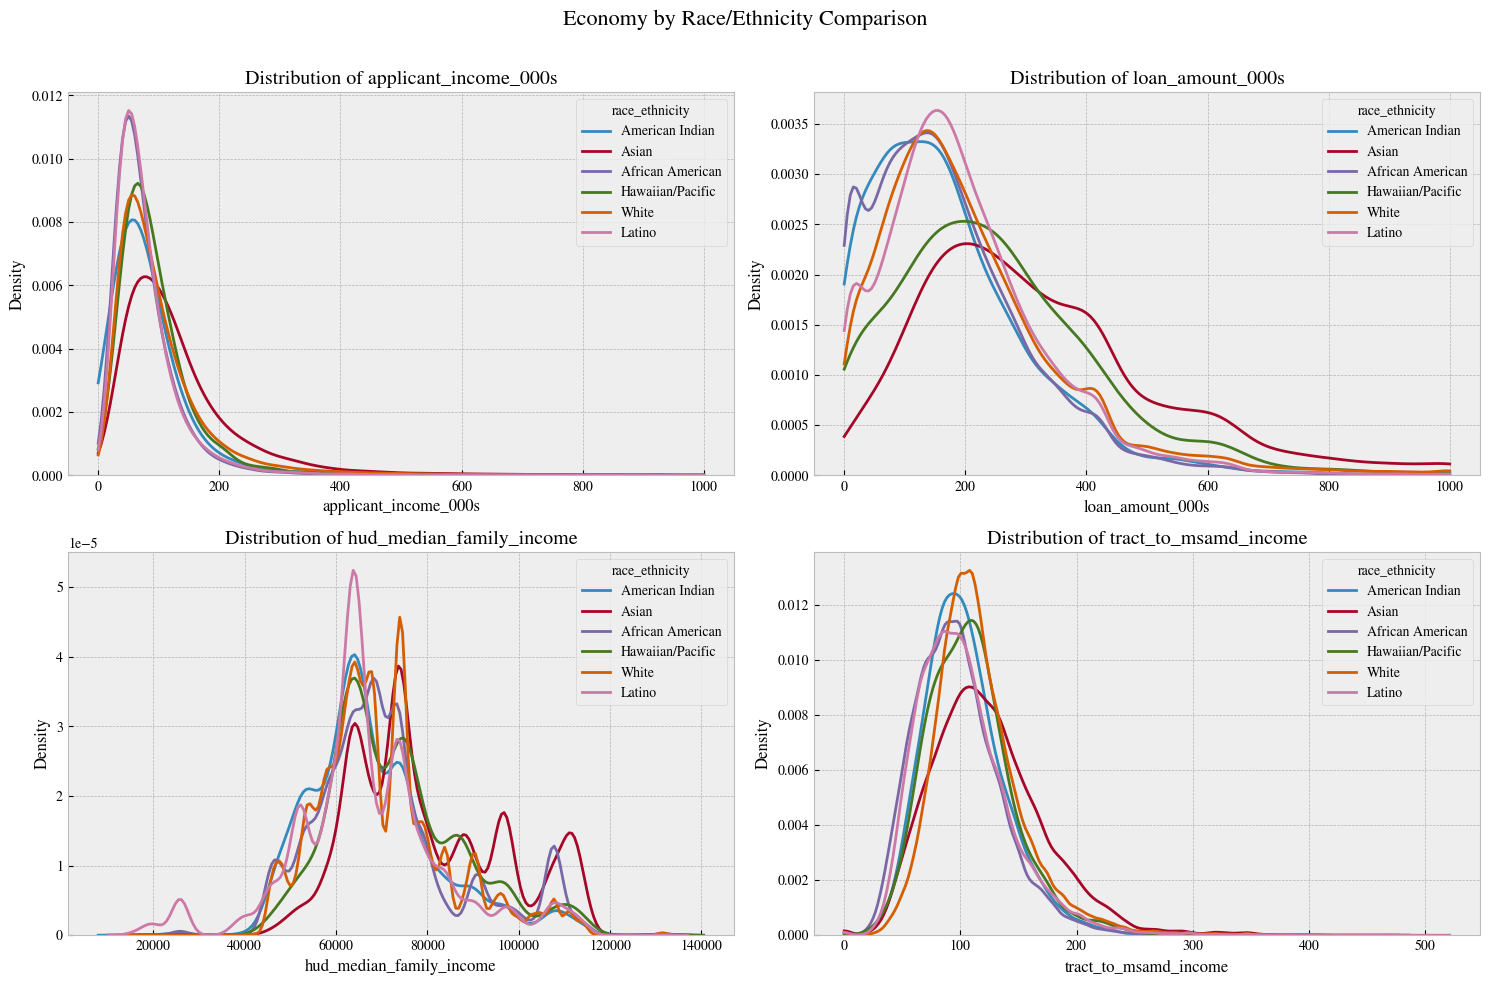

In [44]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
plot_features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "race_ethnicity", groups, group_labels, plot_features, title="Economy by Race/Ethnicity Comparison")

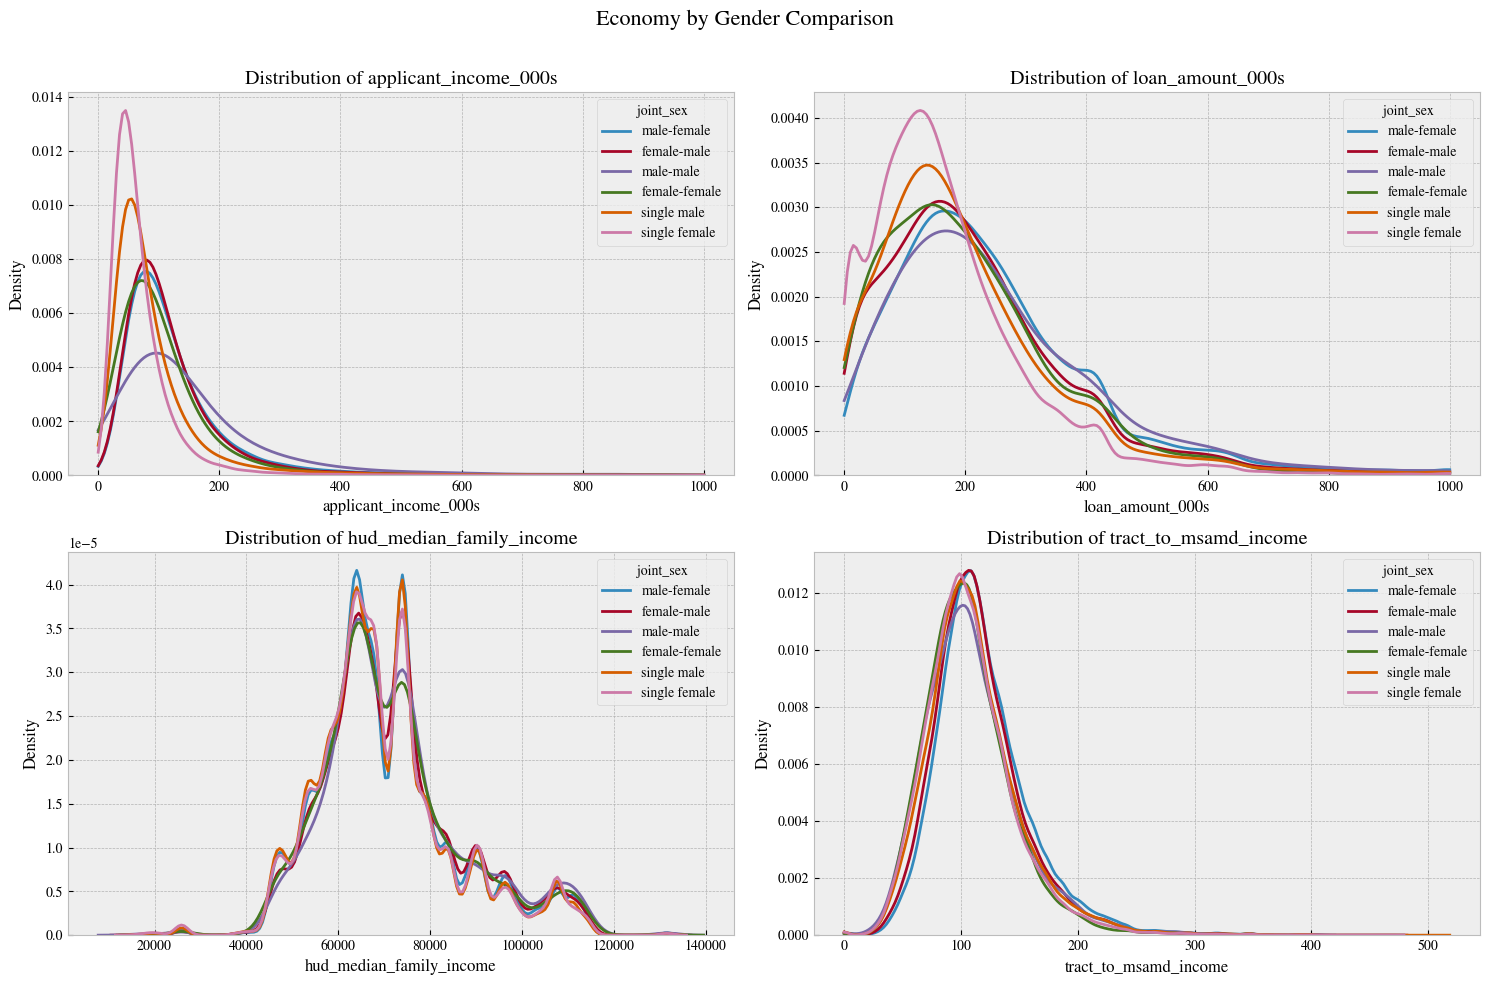

In [45]:
groups = ['1_2', '2_1', '1_1', '2_2', '1_5', '2_5']
group_labels = ["male-female", "female-male", "male-male", "female-female", "single male", "single female"]
plot_features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'tract_to_msamd_income']

plot_density_differences(data, "joint_sex", groups, group_labels, plot_features, title="Economy by Gender Comparison")

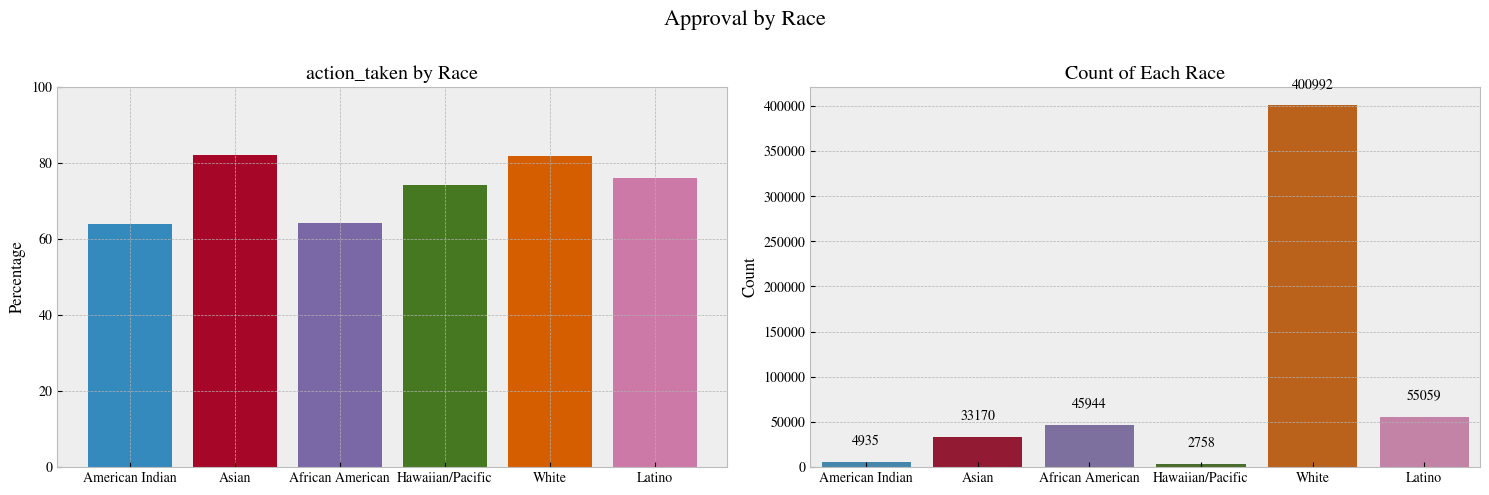

In [46]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
plot_features = ['action_taken']

plot_histogram_differences(data, 'race_ethnicity', 'action_taken', groups, group_labels, plot_features, title='Approval by Race')

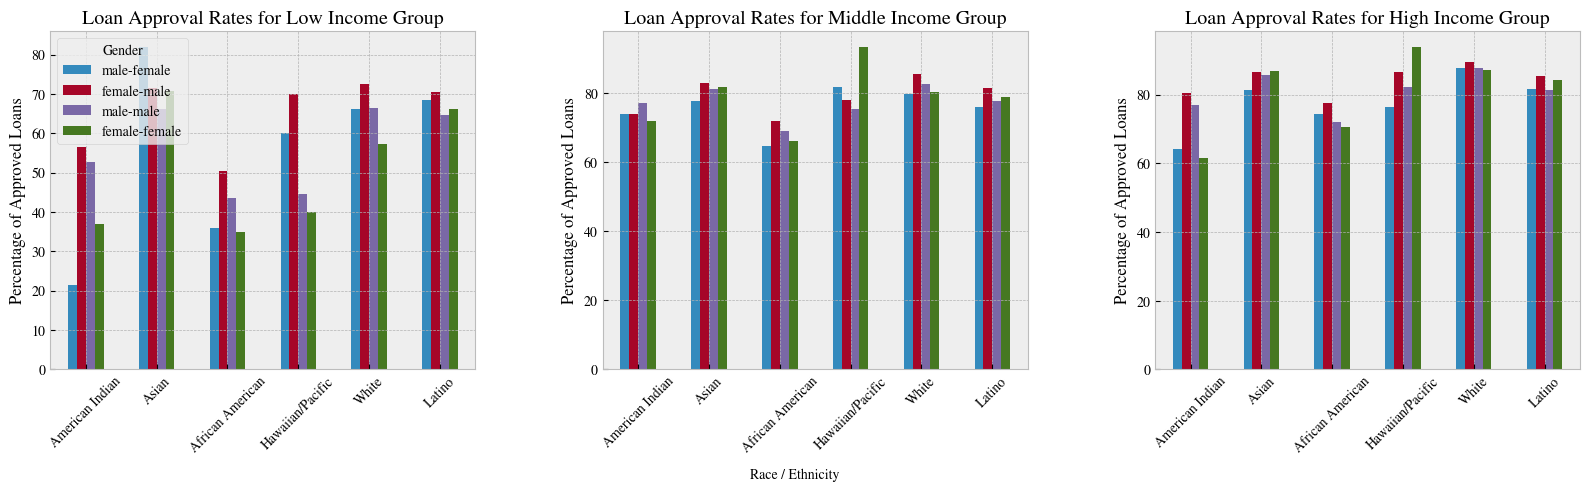

In [47]:
approval_rates(data)

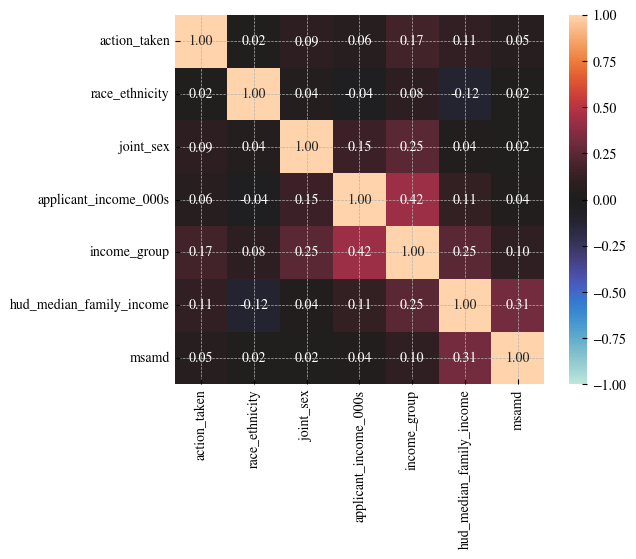

In [48]:
subset = data[["action_taken", "race_ethnicity", "joint_sex", "applicant_income_000s", "income_group", "hud_median_family_income", "msamd"]]
associations_df = associations(subset)

# Statistical Analysis

In [49]:
race_dict = {
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    5: 'White',
    9: 'White Latino'
}

def test_difference(data, races=[]):

    print(f"\nRaces: {races[0]}, {race_dict[races[0]]} & {races[1]}, {race_dict[races[1]]}")

    subset = data[data.race_ethnicity.isin(races)]
    cont_table = pd.crosstab(index=subset['action_taken'], columns=subset['race_ethnicity'])
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

In [50]:
# Create a contingency table of loan approval status, race, and income group
cont_table = pd.crosstab([data['action_taken'], data['race_ethnicity']],
                         data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

income_group                   high    low  middle
action_taken race_ethnicity                       
Approved     1                  763    985    1409
             2                13850   4000    9370
             3                 6238  10037   13190
             4                  650    448     950
             5               111648  83219  133215
             9                 8470  15137   18221
Denied       1                  250    981     547
             2                 2261   1681    2008
             3                 2112   8840    5527
             4                  136    283     291
             5                15985  31696   25229
             9                 1738   6784    4709
Chi-square test statistic: 28931.559810978746
P-value: 0.0


In [51]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['income_group'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

income_group    high     low  middle
action_taken                        
Approved      141619  113826  176355
Denied         22482   50265   38311
Chi-square test statistic: 15943.535041002657
P-value: 0.0


In [52]:
# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=data['action_taken'], columns=data['race_ethnicity'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

race_ethnicity     1      2      3     4       5      9
action_taken                                           
Approved        3157  27220  29465  2048  328082  41828
Denied          1778   5950  16479   710   72910  13231
Chi-square test statistic: 9324.176852042065
P-value: 0.0


In [53]:
df_minorities = data[data.race_ethnicity.isin([1, 2, 3, 4, 9])].sample(100000)

# Create a contingency table of loan approval status, race
cont_table = pd.crosstab(index=df_minorities['action_taken'], columns=df_minorities['race_ethnicity'])

# Print the contingency table
print(cont_table)

# Perform the chi-square test
stat, p_val, dof, exp_val = chi2_contingency(cont_table)
print('Chi-square test statistic:', stat)
print('P-value:', p_val)

race_ethnicity     1      2      3     4      9
action_taken                                   
Approved        2211  19209  20793  1463  29468
Denied          1267   4193  11589   511   9296
Chi-square test statistic: 2593.4819252723164
P-value: 0.0


In [54]:
test_difference(data, races=[3, 5])


Races: 3, Black or African American & 5, White
race_ethnicity      3       5
action_taken                 
Approved        29465  328082
Denied          16479   72910
Chi-square test statistic: 8056.595292571964
P-value: 0.0


In [55]:
races = data.race_ethnicity.unique()

for race in races:

    print(f"Race: {race_dict[race]}")

    df = data.copy()
    df['X'] = [1 if r==race else 0 for r in data.race_ethnicity]

    cont_table = pd.crosstab(index=df['action_taken'], columns=df['X'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)

Race: White
X                  0       1
action_taken                
Approved      103718  328082
Denied         38148   72910
Chi-square test statistic: 4882.392931500879
P-value: 0.0
Race: Black or African American
X                  0      1
action_taken               
Approved      402335  29465
Denied         94579  16479
Chi-square test statistic: 7323.063614331873
P-value: 0.0
Race: White Latino
X                  0      1
action_taken               
Approved      389972  41828
Denied         97827  13231
Chi-square test statistic: 480.34483690217644
P-value: 1.7976617870948006e-106
Race: Asian
X                  0      1
action_taken               
Approved      404580  27220
Denied        105108   5950
Chi-square test statistic: 137.7182996843706
P-value: 8.398412975954495e-32
Race: American Indian or Alaska Native
X                  0     1
action_taken              
Approved      428643  3157
Denied        109280  1778
Chi-square test statistic: 741.0108529595033
P-value: 3

In [56]:
df_minorities = data[data.race_ethnicity.isin([1, 2, 3, 4, 9])]
races = df_minorities.race_ethnicity.unique()

for race in races:

    print(f"\nRace: {race}, {race_dict[race]}")

    df_minorities = df_minorities.copy()
    df_minorities['race'] = [1 if r==race else 0 for r in df_minorities.race_ethnicity]

    cont_table = pd.crosstab(index=df_minorities['action_taken'], columns=df_minorities['race'])
    # Print the contingency table
    print(cont_table)

    # Perform the chi-square test
    stat, p_val, dof, exp_val = chi2_contingency(cont_table)
    print('Chi-square test statistic:', stat)
    print('P-value:', p_val)


Race: 3, Black or African American
race              0      1
action_taken              
Approved      74253  29465
Denied        21669  16479
Chi-square test statistic: 2784.946420789497
P-value: 0.0

Race: 9, White Latino
race              0      1
action_taken              
Approved      61890  41828
Denied        24917  13231
Chi-square test statistic: 374.03377959383545
P-value: 2.4770110103360882e-83

Race: 2, Asian
race              0      1
action_taken              
Approved      76498  27220
Denied        32198   5950
Chi-square test statistic: 1764.253074903303
P-value: 0.0

Race: 1, American Indian or Alaska Native
race               0     1
action_taken              
Approved      100561  3157
Denied         36370  1778
Chi-square test statistic: 216.69688168678888
P-value: 4.752282012238127e-49

Race: 4, Native Hawaiian or Other Pacific Islander
race               0     1
action_taken              
Approved      101670  2048
Denied         37438   710
Chi-square test sta

# PCA Visualization

In [57]:
from PCA import PCA, fair_PCA, corr_plot, plot_reconstruction_loss

In [58]:
data = data_loader(race_cols, num=100000, one_hot=True)
x_train, x_val, x_test, y_train, y_val , y_test, train_groups, val_groups, test_groups = preprocess(data, features, race_cols)

x_train_df = pd.DataFrame(x_train, columns=features)
x_test_df = pd.DataFrame(x_test, columns=features)

X_PCA, explained_variance = PCA(x_train_df, n_components=2)
X_fair_PCA, U, explained_variance = fair_PCA(x_train, n_components=x_train.shape[1], groups=train_groups)
x_test_pca = x_test @ U

Loading data...
processed_data.csv exists. Loading data from file.
x_train: 70.00%
x_val: 15.00%
x_test: 15.00%
Num features BEFORE filtering features 54
Num features AFTER filtering features 11
x_train shape:  (395460, 11)
y_train shape:  (84742, 11)


(395460, 11)


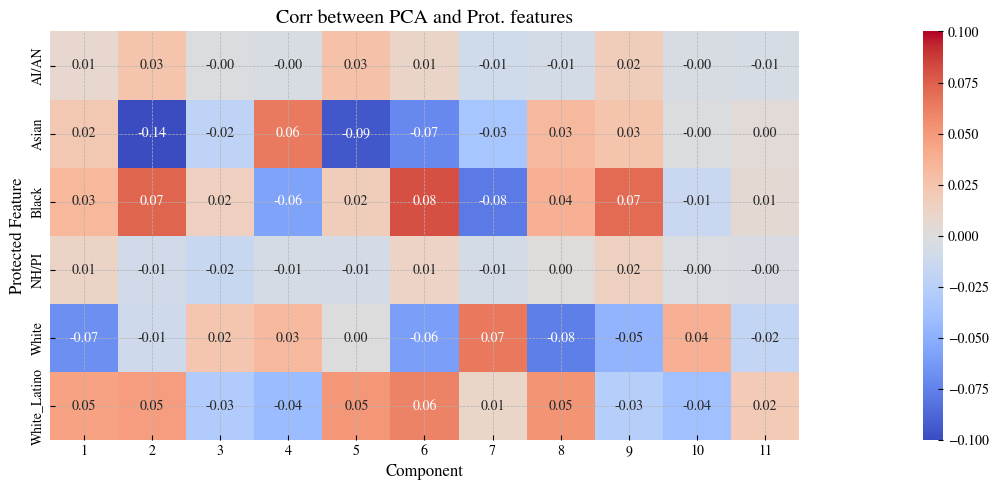

(395460, 6)


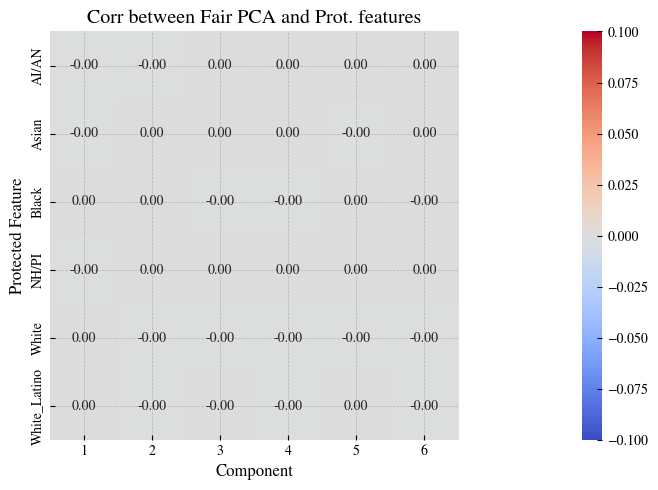

In [59]:
corr_plot(x_train_df, 'pearson', train_groups, n_components=11, fair=False)
corr_plot(x_train, 'pearson', train_groups, n_components=11, fair=True)

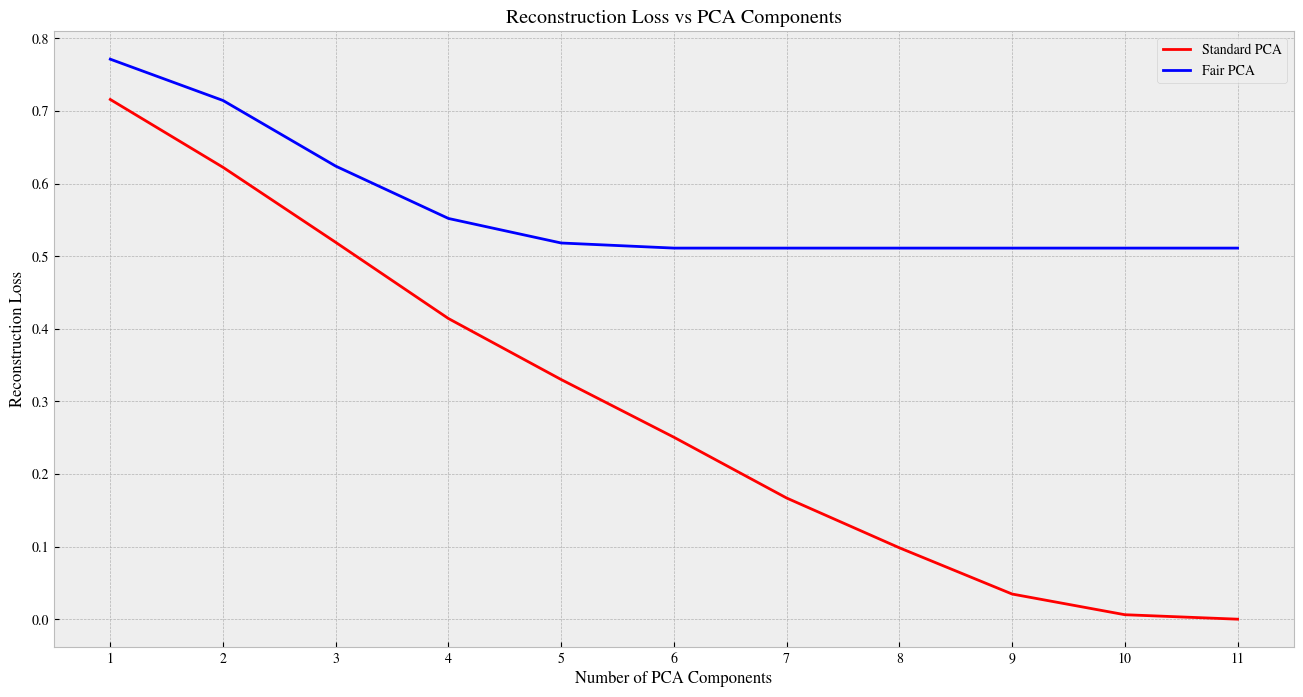

In [60]:
plot_reconstruction_loss(x_train_df, x_test_df, n_components=11, groups=train_groups)

# Explainability Analysis

In [61]:
import pandas as pd
import shap
import torch
shap.initjs()

from LR_pt import LogisticRegression
from NN import SimpleNN

In [62]:
data = data_loader(race_cols, num=100000, one_hot=True)
x_train, x_val, x_test, y_train, y_val , y_test, train_groups, val_groups, test_groups = preprocess(data, features, race_cols)
X = torch.from_numpy(x_test).float()
y = torch.from_numpy(np.array(y_test)).long().view(-1, 1)

X_fair_PCA, U, explained_variance = fair_PCA(x_train, n_components=x_train.shape[1], groups=train_groups)
x_test_pca = x_test @ U

Loading data...
processed_data.csv exists. Loading data from file.
x_train: 70.00%
x_val: 15.00%
x_test: 15.00%
Num features BEFORE filtering features 54
Num features AFTER filtering features 11
x_train shape:  (395460, 11)
y_train shape:  (84742, 11)


## Loading models and inserting state

In [63]:
# Loading neural network
model_nn_state = torch.load("../models/NN_pca:False_E:50_lr:0.0001_bs:512.pt")
model_nn = SimpleNN(X.shape[1], 2)
model_nn.load_state_dict(model_nn_state)

# loading neural network with fair PCA
model_nn_fair_state = torch.load("../models/NN_pca:True_E:50_lr:0.0001_bs:512.pt")
model_nn_fair = SimpleNN(X_fair_PCA.shape[1], 2)
model_nn_fair.load_state_dict(model_nn_fair_state)

<All keys matched successfully>

In [64]:
#print(model_lr(X[0:10])) # 1st index
print(model_nn(X[0:10])) # 8th index
print(model_nn_fair(X_fair_PCA[0:10]))

tensor([[0.5703, 0.4297],
        [0.2932, 0.7068],
        [0.3278, 0.6722],
        [0.2984, 0.7016],
        [0.5358, 0.4642],
        [0.2484, 0.7516],
        [0.1420, 0.8580],
        [0.4122, 0.5878],
        [0.4597, 0.5403],
        [0.7799, 0.2201]], grad_fn=<SoftmaxBackward0>)
tensor([[4.8767e-01, 5.1233e-01],
        [1.2945e-01, 8.7055e-01],
        [5.9889e-01, 4.0111e-01],
        [2.2583e-01, 7.7417e-01],
        [2.1245e-01, 7.8755e-01],
        [9.9943e-01, 5.7222e-04],
        [2.4878e-01, 7.5122e-01],
        [5.3942e-01, 4.6058e-01],
        [1.8003e-01, 8.1997e-01],
        [3.8225e-01, 6.1775e-01]], grad_fn=<SoftmaxBackward0>)


## Neural Network - SHAP Analysis

In [65]:
X_sub = X[:1000]
explainer_nn = shap.DeepExplainer(model_nn, X_sub)
shap_values_nn = explainer_nn.shap_values(X_sub)

In [66]:
model_nn(X_sub[:10])

tensor([[0.5777, 0.4223],
        [0.2541, 0.7459],
        [0.4970, 0.5030],
        [0.3288, 0.6712],
        [0.5567, 0.4433],
        [0.2618, 0.7382],
        [0.2424, 0.7576],
        [0.6267, 0.3733],
        [0.4698, 0.5302],
        [0.7589, 0.2411]], grad_fn=<SoftmaxBackward0>)

In [67]:
shap.force_plot(np.mean(y_test), shap_values_nn[1][0], feature_names=clean_features)

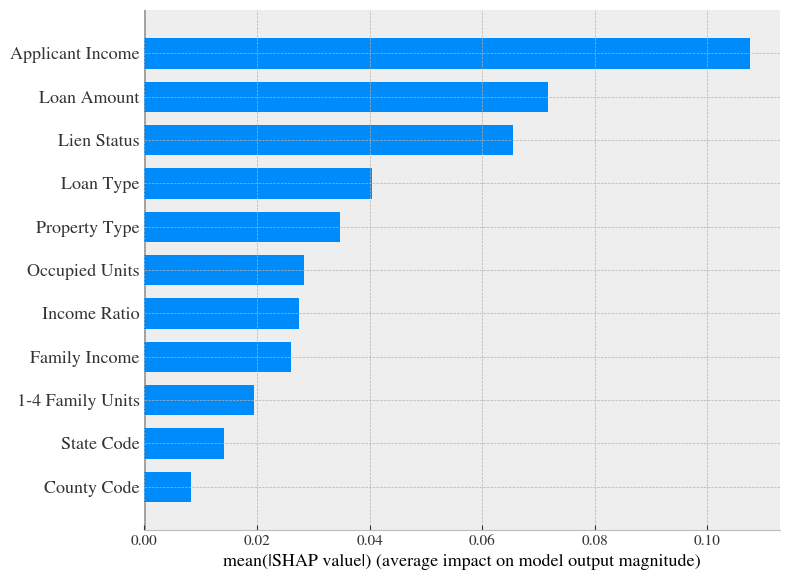

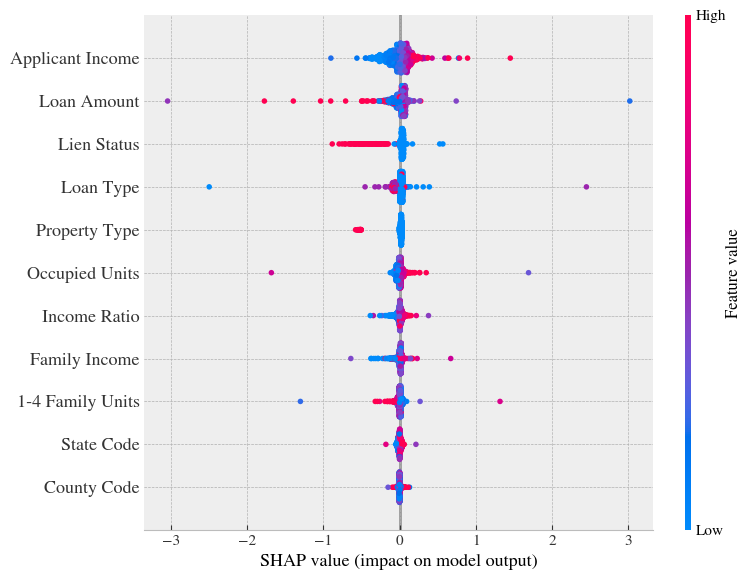

In [68]:
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features, plot_type='bar')
shap.summary_plot(shap_values_nn[1], X_sub, feature_names=clean_features)

## Neural Network FairPCA - SHAP Analysis

In [69]:
model_nn_fair

SimpleNN(
  (fc_layers): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Dropout(p=0.4, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=2, bias=True)
    (7): Softmax(dim=1)
  )
)

In [70]:
x_fair = torch.from_numpy(x_test_pca[:1000]).float()
explainer_fair = shap.DeepExplainer(model_nn_fair, x_fair)
shap_values_fair = explainer_fair.shap_values(x_fair)

In [71]:
model_nn_fair(x_fair[0:10])

tensor([[0.2717, 0.7283],
        [0.4160, 0.5840],
        [0.3687, 0.6313],
        [0.2708, 0.7292],
        [0.6609, 0.3391],
        [0.4575, 0.5425],
        [0.3921, 0.6079],
        [0.6130, 0.3870],
        [0.4611, 0.5389],
        [0.5022, 0.4978]], grad_fn=<SoftmaxBackward0>)

In [72]:
shap.force_plot(np.mean(y_test), shap_values_fair[1][4])

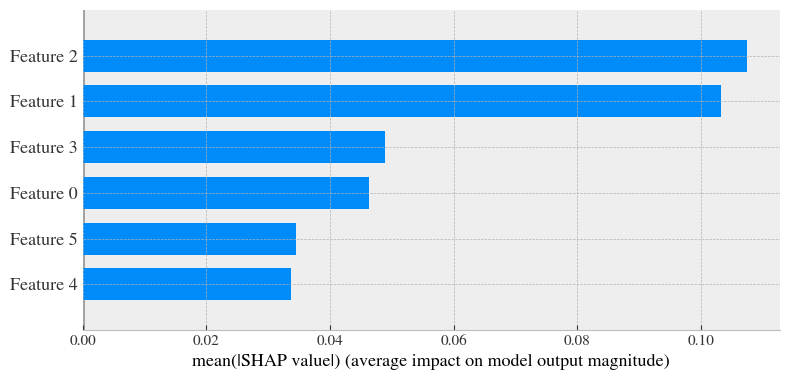

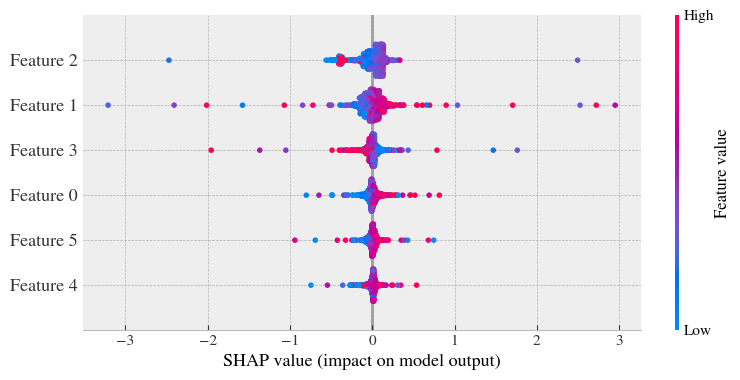

In [73]:
shap.summary_plot(shap_values_fair[1], x_fair, plot_type='bar')
shap.summary_plot(shap_values_fair[1], x_fair)